In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
np.random.seed(5)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | sandnessjoen
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | tsimlyansk
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | beyneu
Processing Record 13 of Set 1 | waingapu
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | chongwe
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | gat
Processing Record 20 of Set 1 | guinguineo
Processing Record 21 of Set 1 | palasa
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set

Processing Record 35 of Set 4 | do gonbadan
Processing Record 36 of Set 4 | vila velha
Processing Record 37 of Set 4 | sambava
Processing Record 38 of Set 4 | chumikan
Processing Record 39 of Set 4 | denpasar
Processing Record 40 of Set 4 | kirakira
Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | verkhoyansk
Processing Record 43 of Set 4 | belyy yar
Processing Record 44 of Set 4 | salto del guaira
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | sola
Processing Record 47 of Set 4 | hilo
Processing Record 48 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 49 of Set 4 | artyk
City not found. Skipping...
Processing Record 50 of Set 4 | lola
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | aripuana
Processing Record 3 of Set 5 | dauphin
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | kurchum
Processing Record 6 of Set 5 | verkhniye tatyshly
Processing Record 7 of Set 5 |

Processing Record 26 of Set 8 | rojhan
Processing Record 27 of Set 8 | roma
Processing Record 28 of Set 8 | sabang
Processing Record 29 of Set 8 | mazagao
Processing Record 30 of Set 8 | alyangula
Processing Record 31 of Set 8 | tarudant
City not found. Skipping...
Processing Record 32 of Set 8 | sobolevo
Processing Record 33 of Set 8 | galle
Processing Record 34 of Set 8 | riyadh
Processing Record 35 of Set 8 | lima
Processing Record 36 of Set 8 | port moresby
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | asfi
Processing Record 39 of Set 8 | abu zabad
Processing Record 40 of Set 8 | lakota
Processing Record 41 of Set 8 | pangody
Processing Record 42 of Set 8 | bargal
City not found. Skipping...
Processing Record 43 of Set 8 | kurilsk
Processing Record 44 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 45 of Set 8 | townsville
Processing Record 46 of Set 8 | oria
Processing Record 47 of Set 8 | falavarjan
Processing Record 48 of Set 8 | golden

Processing Record 15 of Set 12 | sozopol
Processing Record 16 of Set 12 | marsh harbour
Processing Record 17 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 18 of Set 12 | christchurch
Processing Record 19 of Set 12 | adrar
Processing Record 20 of Set 12 | mozarlandia
Processing Record 21 of Set 12 | saint-georges
Processing Record 22 of Set 12 | uyuni
Processing Record 23 of Set 12 | quatre cocos
Processing Record 24 of Set 12 | port lincoln
Processing Record 25 of Set 12 | pottsville
Processing Record 26 of Set 12 | mayo
Processing Record 27 of Set 12 | safaga
Processing Record 28 of Set 12 | coxim
Processing Record 29 of Set 12 | eyl
Processing Record 30 of Set 12 | cabra
Processing Record 31 of Set 12 | bonfim
Processing Record 32 of Set 12 | arcata
Processing Record 33 of Set 12 | santa cruz de la palma
Processing Record 34 of Set 12 | freeport
Processing Record 35 of Set 12 | saint anthony
Processing Record 36 of Set 12 | tabou
Processing Record 3

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,44.92,80,44,8.39,AU,2022-05-16 14:39:20
1,Sandnessjoen,66.0217,12.6316,43.32,64,75,8.05,NO,2022-05-16 14:45:26
2,Port Alfred,-33.5906,26.8910,73.18,75,0,1.99,ZA,2022-05-16 14:39:06
3,Qaanaaq,77.4840,-69.3632,22.86,75,28,6.17,GL,2022-05-16 14:40:58
4,Georgetown,5.4112,100.3354,80.53,93,40,3.44,MY,2022-05-16 14:40:36
5,San Quintin,30.4833,-115.9500,60.39,79,88,11.68,MX,2022-05-16 14:40:37
6,Tsimlyansk,47.6461,42.1019,61.59,48,54,11.01,RU,2022-05-16 14:45:27
7,Butaritari,3.0707,172.7902,81.30,76,100,13.76,KI,2022-05-16 14:44:04
8,Rikitea,-23.1203,-134.9692,77.34,69,38,19.84,PF,2022-05-16 14:37:36
9,Saint-Philippe,-21.3585,55.7679,72.99,81,100,12.91,RE,2022-05-16 14:40:38


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_newcol_df = city_data_df[new_column_order]
city_newcol_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-05-16 14:39:20,-42.7826,147.0587,44.92,80,44,8.39
1,Sandnessjoen,NO,2022-05-16 14:45:26,66.0217,12.6316,43.32,64,75,8.05
2,Port Alfred,ZA,2022-05-16 14:39:06,-33.5906,26.8910,73.18,75,0,1.99
3,Qaanaaq,GL,2022-05-16 14:40:58,77.4840,-69.3632,22.86,75,28,6.17
4,Georgetown,MY,2022-05-16 14:40:36,5.4112,100.3354,80.53,93,40,3.44


In [13]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_newcol_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_newcol_df["Lat"]
max_temps = city_newcol_df["Max Temp"]
humidity = city_newcol_df["Humidity"]
cloudiness = city_newcol_df["Cloudiness"]
wind_speed = city_newcol_df["Wind Speed"]

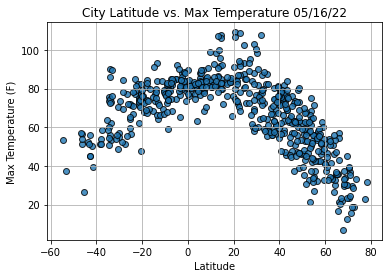

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

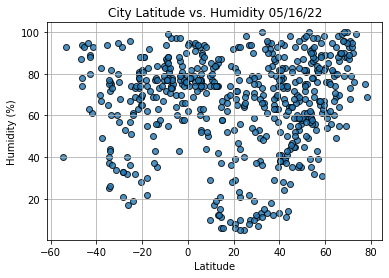

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig2.png")
# Show plot.
plt.show()

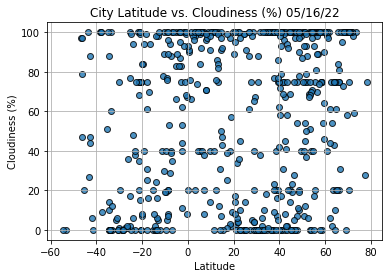

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig3.png")
# Show plot.
plt.show()

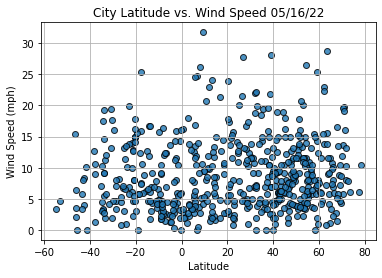

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig4.png")
# Show plot.
plt.show()